# Visualizing the forecastings

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import util
import matplotlib.dates as mdates

## Reading data

In [2]:
df = pd.read_csv('data/df_original_extended.csv')
df.DATA = pd.to_datetime(df.DATA, format='mixed')

In [3]:
df = df.sort_values(by=['MUNICIPIO', 'DATA'])

In [4]:
df_results_lstm = pd.read_csv('lstm/data/df_forecasting.csv', index_col=0)
df_results_lstm['date'] =  pd.to_datetime(df_results_lstm['date'])
df_results_lstm['max_date_to_fit'] = pd.to_datetime(df_results_lstm['max_date_to_fit'])

In [5]:
df_results_sirds = pd.read_csv('sirds/data/df_deaths_forecasted.csv')
df_results_sirds['date'] =  pd.to_datetime(df_results_sirds['date'])
df_results_sirds['max_date_to_fit'] = pd.to_datetime(df_results_sirds['max_date_to_fit'])

In [6]:
df_results_sirds['max_date_to_fit'].unique()

<DatetimeArray>
['2020-04-25 00:00:00', '2020-07-18 00:00:00', '2020-10-10 00:00:00',
 '2021-01-02 00:00:00', '2021-03-27 00:00:00', '2021-06-19 00:00:00',
 '2021-09-11 00:00:00', '2021-12-04 00:00:00', '2022-02-26 00:00:00']
Length: 9, dtype: datetime64[ns]

In [7]:
df_results_sirds_hybrid = pd.read_csv('sirds_hybrid/data/df_deaths_forecasted.csv')
df_results_sirds_hybrid['date'] =  pd.to_datetime(df_results_sirds_hybrid['date'])
df_results_sirds_hybrid['max_date_to_fit'] = pd.to_datetime(df_results_sirds_hybrid['max_date_to_fit'])

In [9]:
df_results_ensemble = pd.read_csv('ensemble_simple/data/df_forecasting.csv', index_col=0)
df_results_ensemble['date'] =  pd.to_datetime(df_results_ensemble['date'])
df_results_ensemble['max_date_to_fit'] = pd.to_datetime(df_results_ensemble['max_date_to_fit'])

In [10]:
max_date = df_results_sirds['date'].max()
list_max_date_to_fit = df_results_sirds['max_date_to_fit'].unique() 

## Presenting actual data

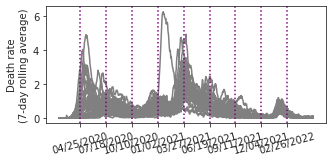

In [11]:
myFmt = mdates.DateFormatter('%m/%d/%Y')
style = dict(color='black')
plt.rc('font', size=8)
sns.set_style("ticks")

fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(12), util.centimeter_to_inch(6)))

for id_municipality in df['CODIGO_MUNICIPIO_6'].unique():
    df_municipality = df.loc[(df['CODIGO_MUNICIPIO_6'] == id_municipality) & (df['DATA']<=max_date)]
    plt.plot(df_municipality['DATA'], df_municipality['TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS'], color='gray')
    
for date_analysis in list_max_date_to_fit:
    ax.axvline(date_analysis, 0, 1, linestyle=':', color='purple')
    
ax.set_xticks(list_max_date_to_fit)
ax.xaxis.set_major_formatter(myFmt)

plt.xticks(rotation=15)

ax.set_ylabel('Death rate\n(7-day rolling average)')
plt.tight_layout()
plt.savefig('images/data.pdf')
plt.savefig('images/data.png')
plt.show()

## Presenting results

In [12]:
df_results_lstm.columns

Index(['forecast', 'municipality', 'municipality_id', 'max_date_to_fit',
       'date', 'execution'],
      dtype='object')

### Results per municipality

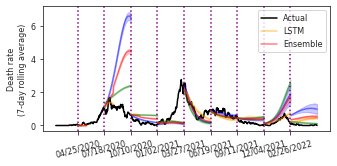

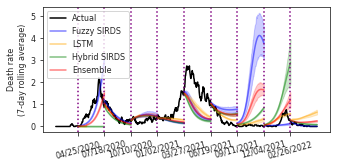

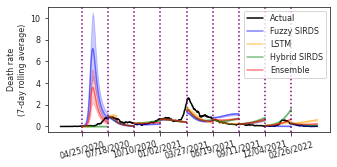

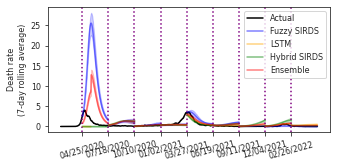

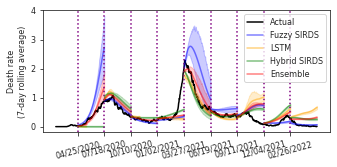

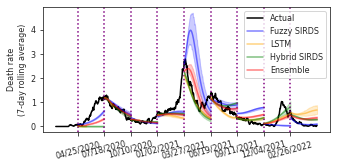

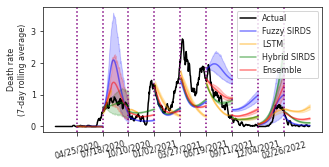

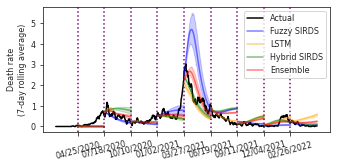

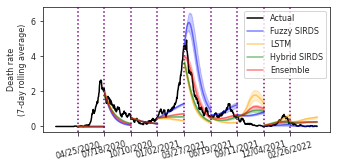

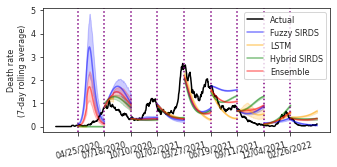

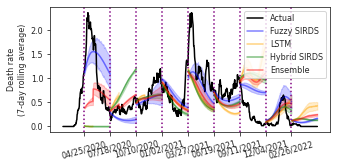

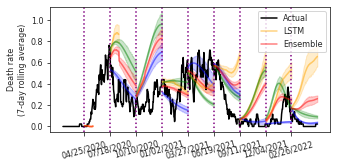

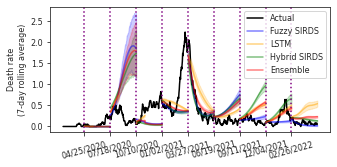

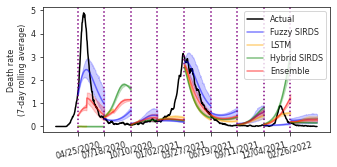

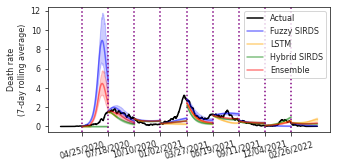

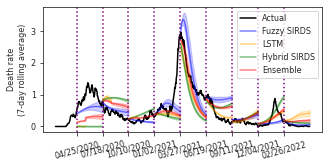

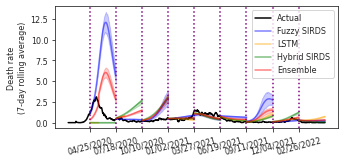

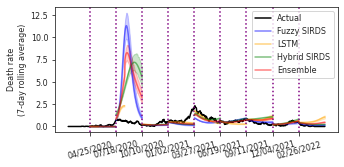

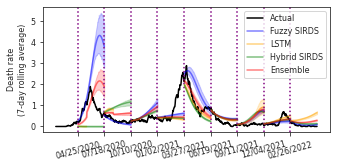

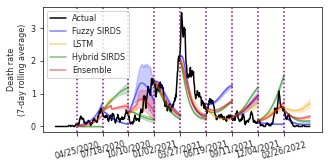

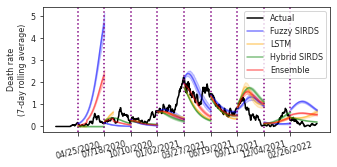

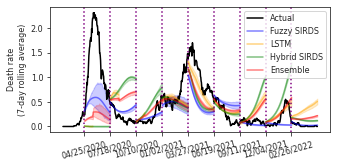

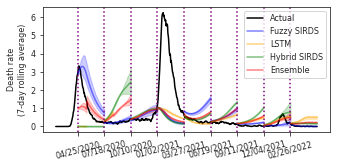

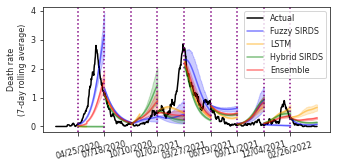

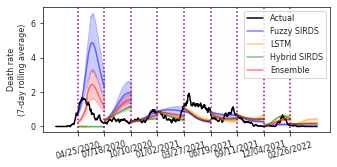

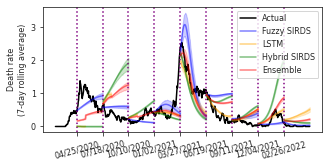

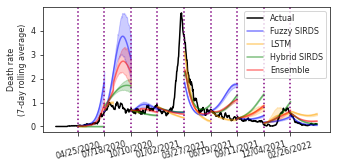

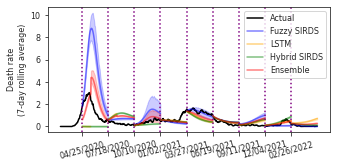

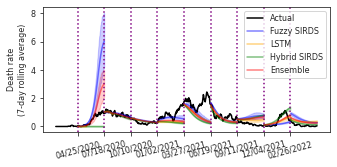

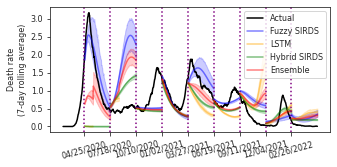

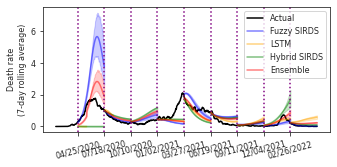

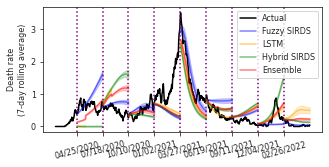

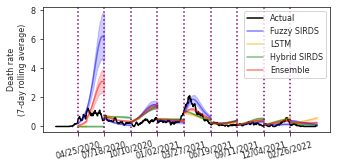

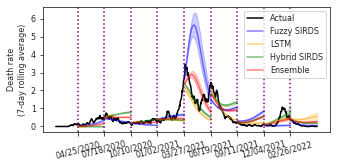

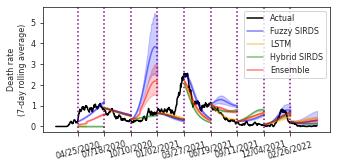

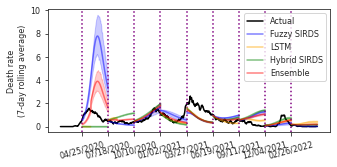

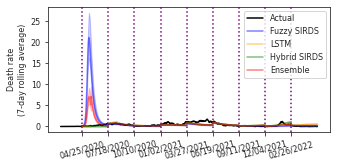

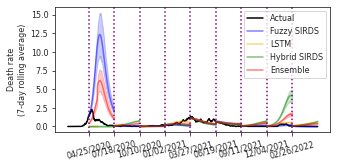

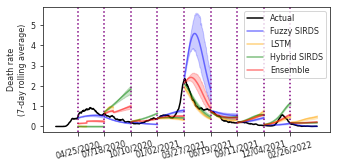

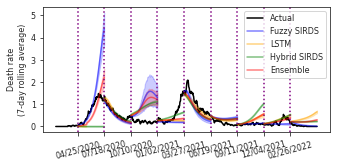

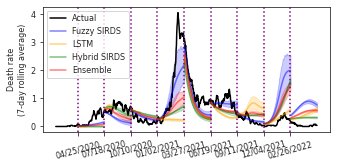

In [13]:
plt.rc('font', size=8)
# for municipality in ['São Paulo']:
for municipality in df['MUNICIPIO'].unique():    
    df_municipality = df.loc[(df['MUNICIPIO'] == municipality) & (df['DATA']<=max_date)]          
    
    fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(12), util.centimeter_to_inch(6)))    
    
    plt.plot(df_municipality['DATA'], df_municipality['TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS'], color='black', label='Actual')            
    
    for date_analysis in list_max_date_to_fit[:]:
        ax.axvline(date_analysis, 0, 1, linestyle=':', color='purple')
        
        df_municipality_sirds = df_results_sirds.loc[(df_results_sirds['municipality']==municipality) & (df_results_sirds['max_date_to_fit']==date_analysis)]
        df_municipality_sirds = df_municipality_sirds.sort_values('date')                
        
        df_municipality_lstm = df_results_lstm.loc[(df_results_lstm['municipality']==municipality) & (df_results_lstm['max_date_to_fit']==date_analysis)]
        df_municipality_lstm = df_municipality_lstm.sort_values('date')
        
        df_municipality_sirds_hybrid = df_results_sirds_hybrid.loc[(df_results_sirds_hybrid['municipality'] == municipality) & (df_results_sirds_hybrid['max_date_to_fit']==date_analysis)]
        df_municipality_sirds_hybrid = df_municipality_sirds_hybrid.sort_values('date')
        
        df_municipality_staking = df_results_ensemble.loc[(df_results_ensemble['municipality'] == municipality) & (df_results_ensemble['max_date_to_fit'] == date_analysis)]
        df_municipality_staking = df_municipality_staking.sort_values('date')
        
        if date_analysis==min(list_max_date_to_fit):
            sns.lineplot(df_municipality_sirds, x='date', y='forecast', alpha=0.5, color='blue', label='Fuzzy SIRDS')
            sns.lineplot(df_municipality_lstm, x='date', y='forecast', alpha=0.5, color='orange', label='LSTM')
            sns.lineplot(df_municipality_sirds_hybrid, x='date', y='forecast', alpha=0.5, color='green', label='Hybrid SIRDS')
            sns.lineplot(df_municipality_staking, x='date', y='forecast', alpha=0.5, color='red', label='Ensemble')
        else:
            sns.lineplot(df_municipality_sirds, x='date', y='forecast', alpha=0.5, color='blue', legend=False)
            sns.lineplot(df_municipality_lstm, x='date', y='forecast', alpha=0.5, color='orange', legend=False)
            sns.lineplot(df_municipality_sirds_hybrid, x='date', y='forecast', alpha=0.5, color='green', legend=False)
            sns.lineplot(df_municipality_staking, x='date', y='forecast', alpha=0.5, color='red', legend=False)                       
            
    ax.set_xticks(list_max_date_to_fit[:])
    ax.xaxis.set_major_formatter(myFmt)

    plt.xticks(rotation=15)
        
    ax.set_ylabel('Death rate\n(7-day rolling average)')
    ax.set_xlabel(None)    
    
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('images/forecasting_'+municipality+'.pdf')
    plt.show()    